<a href="https://colab.research.google.com/github/FaithKare/Supervised-and-Unsupersived-learning-in-R-/blob/master/Unsupervised_Learning_Week_13_part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining The Question 

## a) Specyfing the analysis question

The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.


## b) Metric of Success

The success of this project will be measured once clustering has been performed stating insights drawn from the analysis and visualizations.
and secondly Upon implementation, provide comparisons between the approaches  K-Means clustering vs Hierarchical clustering highlighting the strengths and limitations of each approach in the context of the analysis. 


## c) Understanding the context


Kira Plastinina is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines[1] and Armenia.[2]

## d) Experimental design

1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution
7. Challenge the Solution
8. Follow up Questions


# Data Sourcing and Checking 

In [ ]:
# loading the data
df <- read.csv("http://bit.ly/EcommerceCustomersDataset")

In [ ]:
# Previewing the first entries of the data
head(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
# Checking the rows and columns in the data 
cat("The dataset has ", dim(df)[1], "rows and ", dim(df)[2], " columns")

The dataset has  12330 rows and  18  columns

In [ ]:
# Checking the structure of the dataset
str(df)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

# Data Cleaning 

In [ ]:
# Checking for missing values in the columns 
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [ ]:
#Checking for missing values using the complete function
df[!complete.cases(df),]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1066,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,2,1,Returning_Visitor,FALSE,FALSE
1133,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,1,2,Returning_Visitor,FALSE,FALSE
1134,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,4,5,1,Returning_Visitor,FALSE,FALSE
1135,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE,FALSE
1136,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,3,2,1,1,Returning_Visitor,FALSE,FALSE
1137,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,2,Returning_Visitor,FALSE,FALSE
1474,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,1,1,Returning_Visitor,TRUE,FALSE
1475,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,1,1,6,1,Returning_Visitor,TRUE,FALSE
1476,NA,NA,NA,NA,NA,NA,NA,NA,0,0,Mar,2,2,3,1,Returning_Visitor,FALSE,FALSE


In [ ]:
# Dealing with missing values
# Omitting the columns with null values since they're insignificant
df <- na.omit(df)

In [ ]:
# Checking if there are any more null values
colSums(is.na(df))

# all missing values have been removed 

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [ ]:
# Checking for duplicated rows
duplicate_rows <- df[duplicated(df),]
dim(duplicate_rows)

[1] 117  18

In [ ]:
# Dealing with the duplicated rows
# Removing the duplicated rows by creating a new dataframe with the unique values only.
df <- unique(df)

In [ ]:
# Checking for outliers
# First we get the numeric columns first
num_cols <- unlist(lapply(df, is.numeric))
num_cols


Administrative Administrative_Duration           Informational 
                   TRUE                    TRUE                    TRUE 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                   TRUE                    TRUE                    TRUE 
            BounceRates               ExitRates              PageValues 
                   TRUE                    TRUE                    TRUE 
             SpecialDay                   Month        OperatingSystems 
                   TRUE                   FALSE                    TRUE 
                Browser                  Region             TrafficType 
                   TRUE                    TRUE                    TRUE 
            VisitorType                 Weekend                 Revenue 
                  FALSE                   FALSE                   FALSE

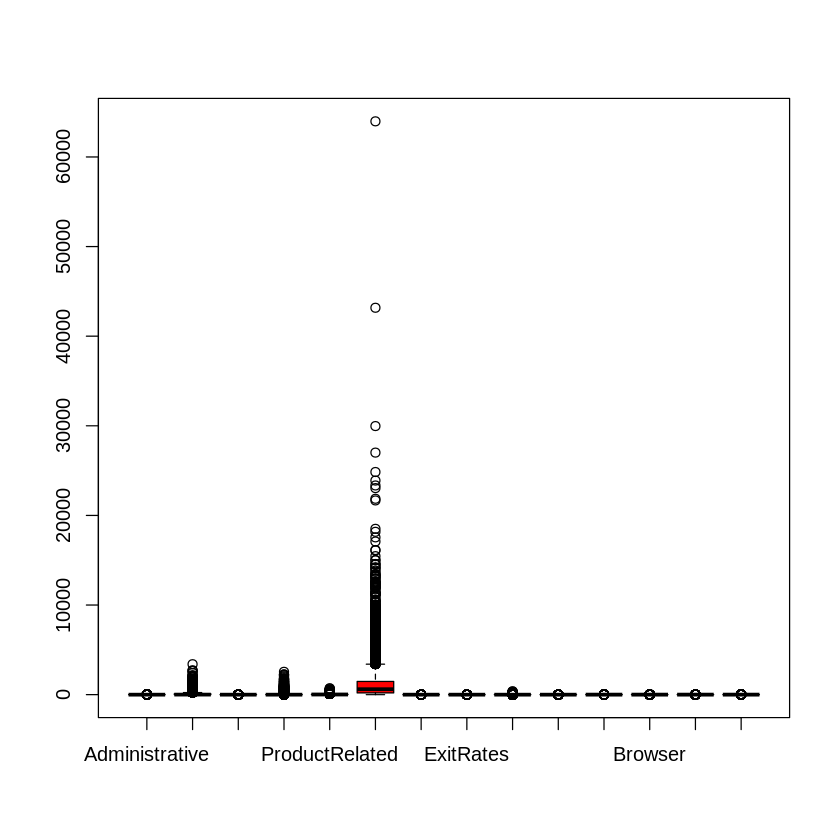

In [ ]:
# Evaluating if there are any outliers in the numeric class
#Subset numeric columns of data
num_df <- df[ ,num_cols]

# Plotting the outliers
boxplot(num_df, col = 'red')

There are mant outliers most of which are related with the productRelated column.
This is expected as most of the clients visit the product related pages and take different times hence the huge variance.


In [ ]:
# Dealing with the outliers through Capping in the administarive column 
x <- df$Administrative
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
df$Administrative[df$Administrative < (qnt[1] - H)] <- caps[1]
df$Administrative[df$Administrative > (qnt[2] + H)] <- caps[2]

In [ ]:
# Dealing with the outliers through Capping in the Product related  column 
x <- df$ProductRelated
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
df$ProductRelated[df$ProductRelated < (qnt[1] - H)] <- caps[1]
df$ProductRelated[df$ProductRelated > (qnt[2] + H)] <- caps[2]

In [ ]:
# Dealing with the outliers through Capping in the exit rate column 
x <- df$ExitRates
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
df$ExitRates[df$ExitRates < (qnt[1] - H)] <- caps[1]
df$ExitRates[df$ExitRates > (qnt[2] + H)] <- caps[2]

In [ ]:
3 # Dealing with the outliers through Capping in the operating sysytem column 
x <- df$OperatingSystems
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
df$OperatingSystems[df$OperatingSystems < (qnt[1] - H)] <- caps[1]
df$OperatingSystems[df$OperatingSystems > (qnt[2] + H)] <- caps[2]

In [ ]:
# Rechecking the rows and columns in the data left
cat("The dataset has ", dim(df)[1], "rows and ", dim(df)[2], " columns")

The dataset has  12199 rows and  18  columns

In [ ]:
# Recreating the numeric dataset without outliers
num_cols1 <- unlist(lapply(df, is.numeric))
num_df1 <- df[ ,num_cols1]

# Exploratory Data Analysis 

## Univariate Analysis

In [ ]:
# Computing some descriptive statistics for the numerical columns 
desc_stats <- data.frame(
  Max = apply(num_df, 2, max),     # Maximum
  Min = apply(num_df1, 2, min),    # minimum
  Median = apply(num_df1, 2, median), # median
  Mean = apply(num_df1, 2, mean),  # mean
  SD = apply(num_df1, 2, sd),       # Standard deviation
  Var = apply(num_df1 , 2 , var)  # variance
  
)
desc_stats <- round(desc_stats, 1)
desc_stats

,Max,Min,Median,Mean,SD,Var
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Administrative,27.0,0,1.0,2.2,2.8,8.1
Administrative_Duration,3398.8,-1,9.0,81.7,177.5,31516.3
Informational,24.0,0,0.0,0.5,1.3,1.6
Informational_Duration,2549.4,-1,0.0,34.8,141.5,20010.5
ProductRelated,705.0,0,18.0,29.1,30.4,924.2
ProductRelated_Duration,63973.5,-1,609.5,1207.5,1919.9,3686121.5
BounceRates,0.2,0,0.0,0.0,0.0,0.0
ExitRates,0.2,0,0.0,0.0,0.0,0.0
PageValues,361.8,0,0.0,6.0,18.7,348.1


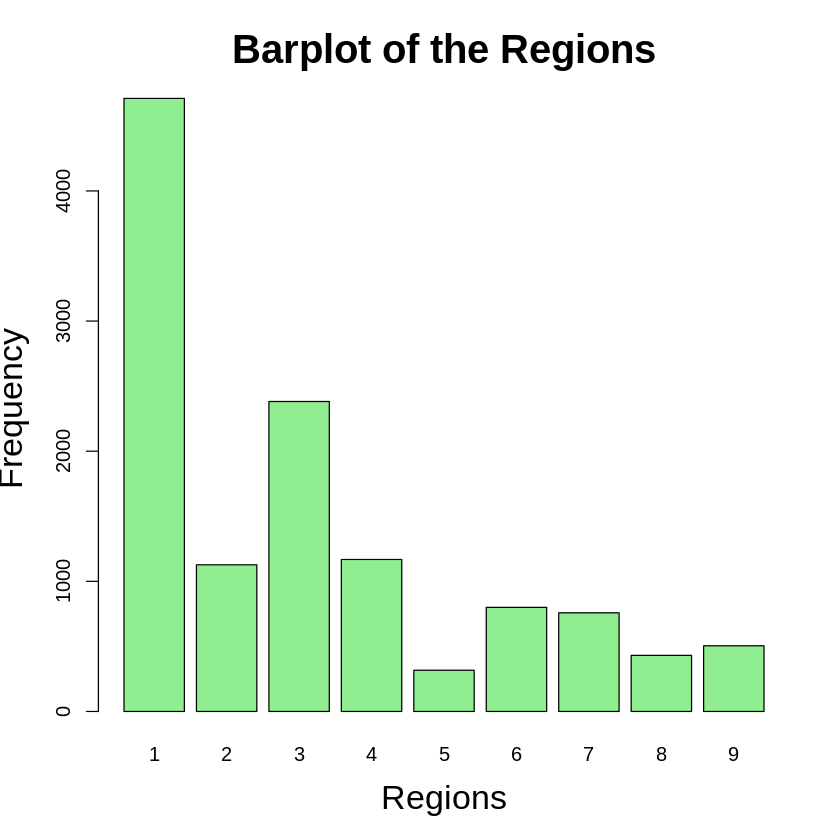

In [ ]:
# Getting the region column
region <- df$Region

# Applying the table() function will compute the frequency distribution of the region variable
region_frequency <- table(region)

# Then applying the barplot function to produce its bar graph
barplot(region_frequency, col = 'lightgreen' , main = 'Barplot of the Regions' , xlab = 'Regions',ylab = 'Frequency' , cex.main = 2, cex.lab = 1.7)

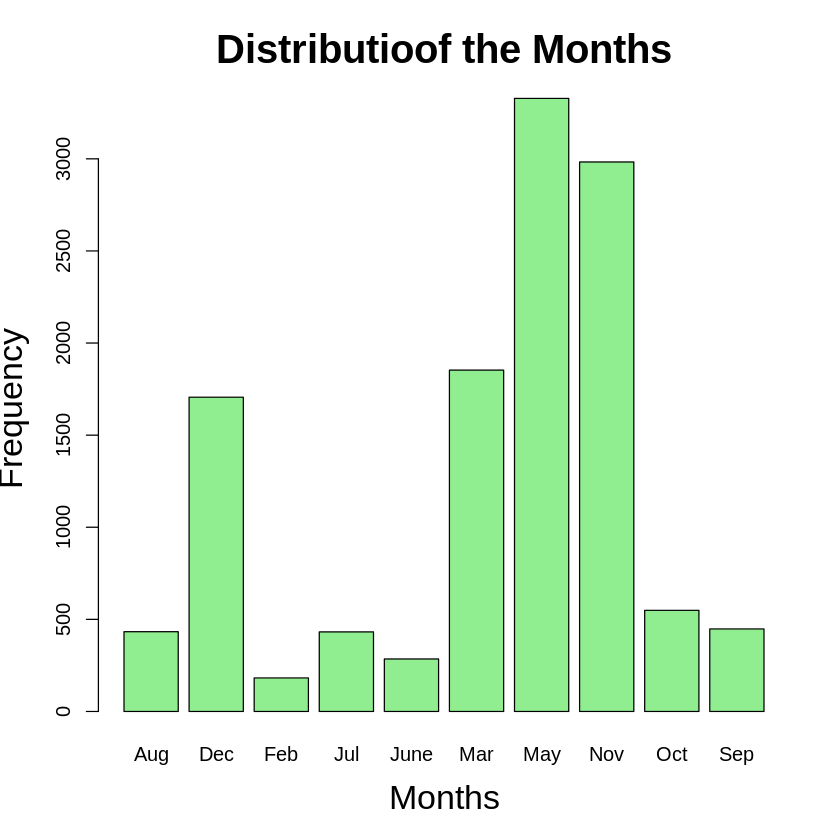

In [ ]:
# Getting the month column
month <- df$Month

# Applying the table() function will compute the frequency distribution of the region variable
month_frequency <- table(month)

# Then applying the barplot function to produce its bar graph
barplot(month_frequency,col = 'lightgreen' , main = 'Distributioof the Months' , xlab = 'Months',ylab = 'Frequency' , cex.main = 2, cex.lab = 1.7) 

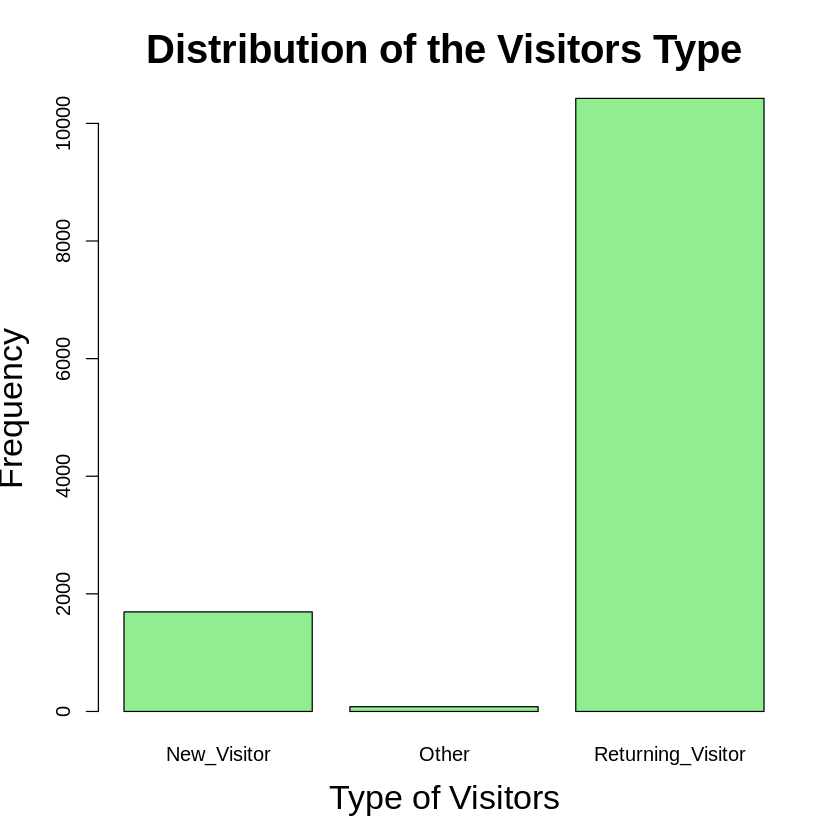

In [ ]:
# Getting the vistor type column
Visitors <- df$VisitorType

# Applying the table() function will compute the frequency distribution of the region variable
visitors_frequency <- table(Visitors)

# Then applying the barplot function to produce its bar graph
barplot(visitors_frequency,col = 'lightgreen' , main = 'Distribution of the Visitors Type' , xlab = 'Type of Visitors',ylab = 'Frequency' , cex.main = 2, cex.lab = 1.7) 

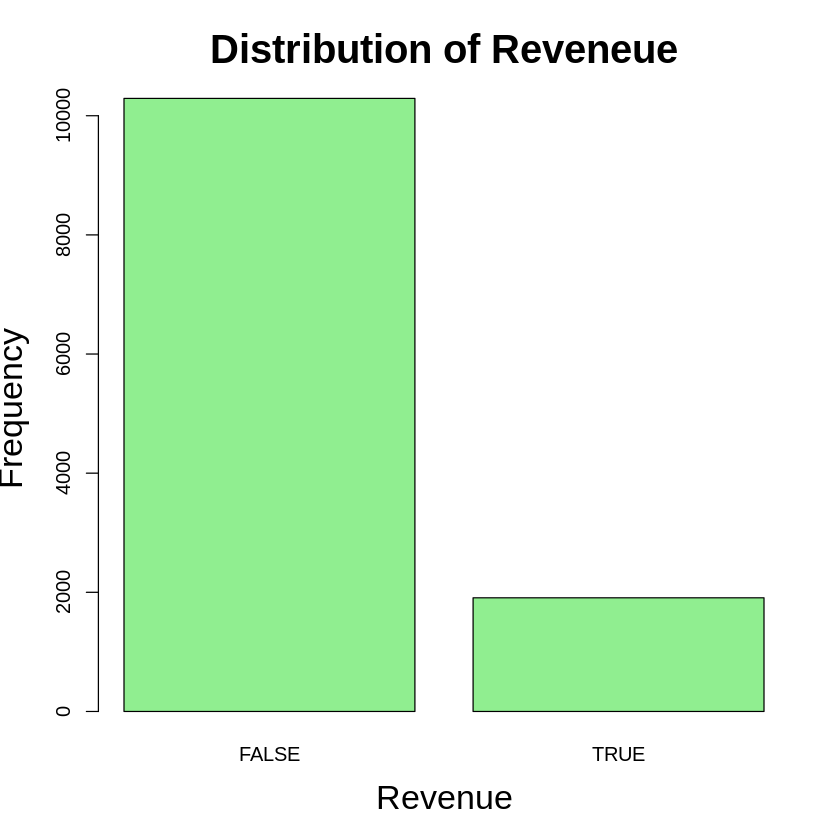

In [ ]:
# Getting the month column
Revenue <- df$Revenue

# Applying the table() function will compute the frequency distribution of the region variable
revenue_frequency <- table(Revenue)

# Then applying the barplot function to produce its bar graph
barplot(revenue_frequency,col = 'lightgreen' , main = 'Distribution of Reveneue' , xlab = 'Revenue',ylab = 'Frequency' , cex.main = 2, cex.lab = 1.7) 

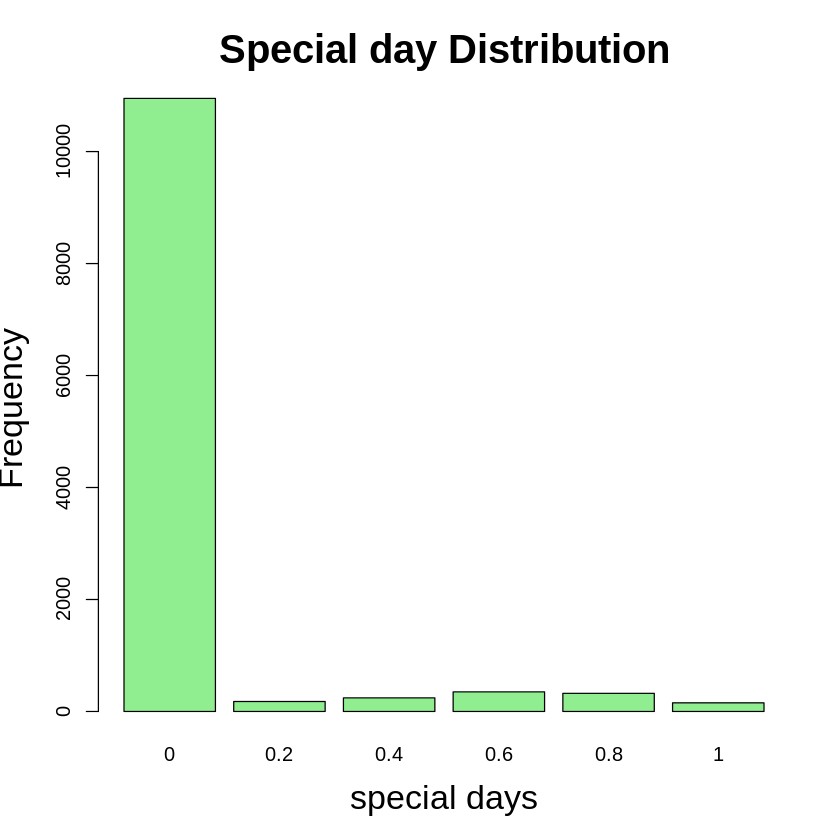

In [ ]:
# Getting the special day column
specialday <- df$SpecialDay

# Applying the table() function will compute the frequency distribution of the region variable
specialday_frequency <- table(specialday)

# Then applying the barplot function to produce its bar graph
barplot(specialday_frequency,col = 'lightgreen' , main = 'Special day Distribution' , xlab = 'special days',ylab = 'Frequency' , cex.main = 2, cex.lab = 1.7) 

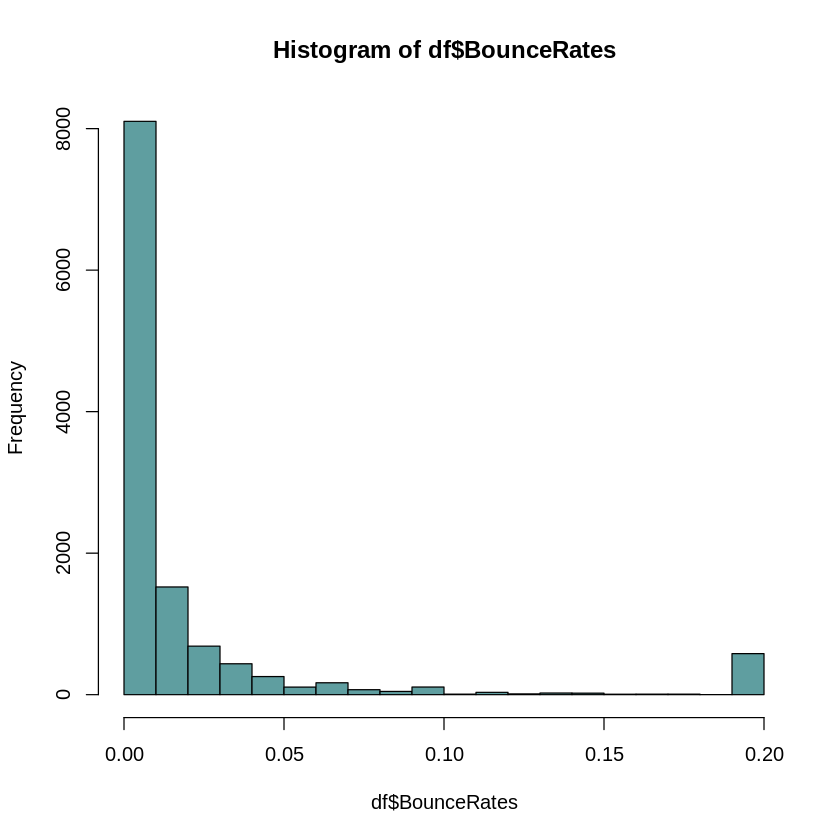

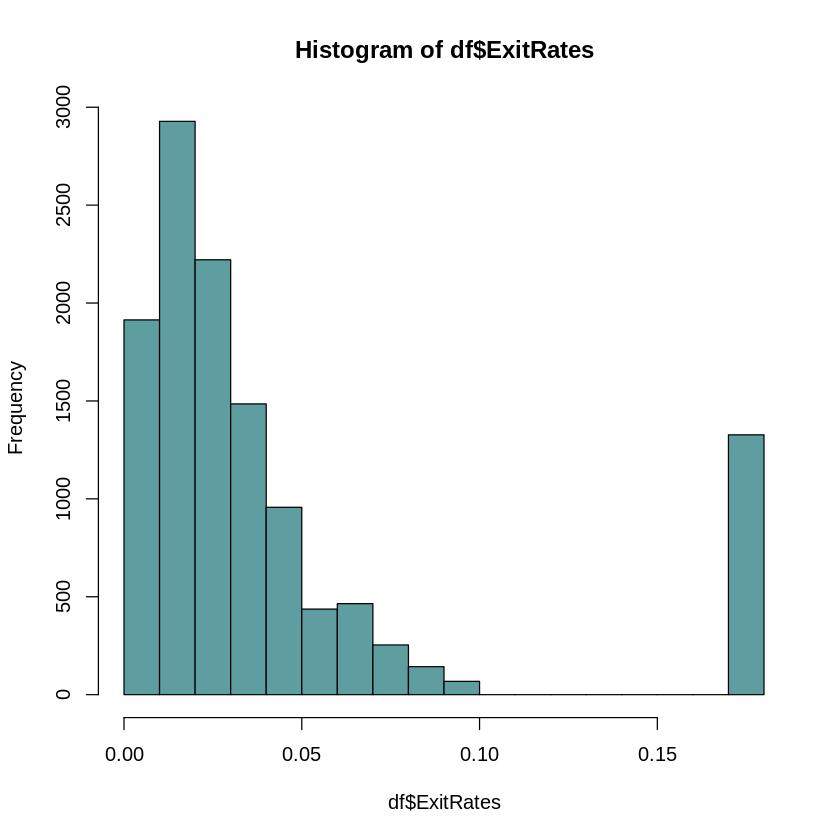

In [ ]:
# distributios of bounce rates and exit rates
hist(df$BounceRates, col='cadetblue')
hist(df$ExitRates, col='cadetblue')

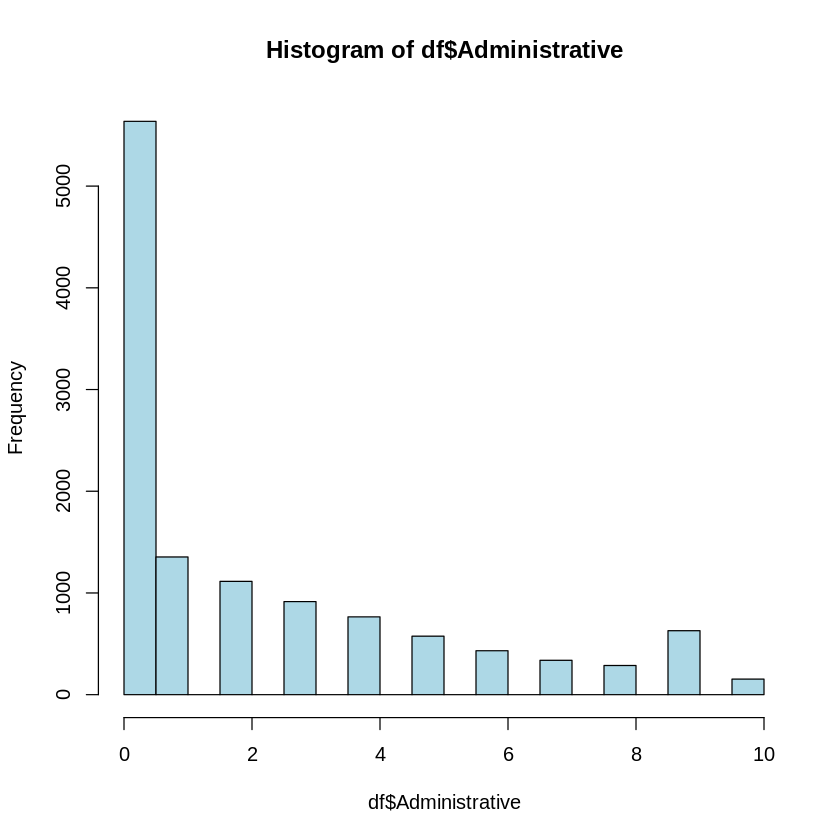

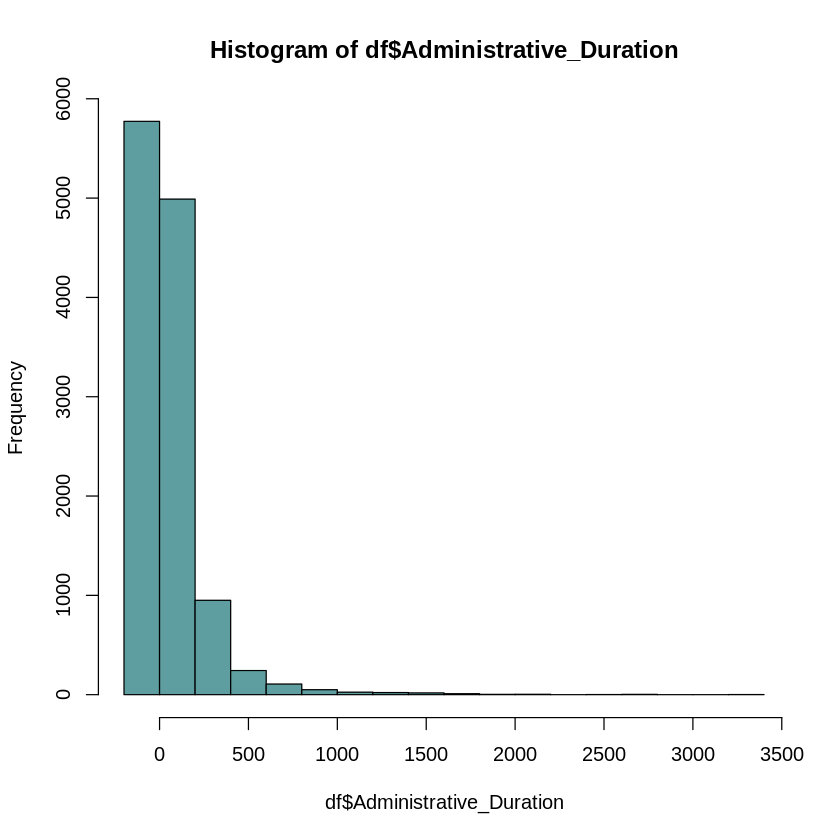

In [ ]:
# Histogram of Administrative
hist(df$Administrative, col='lightblue')
hist(df$Administrative_Duration, col='cadetblue')

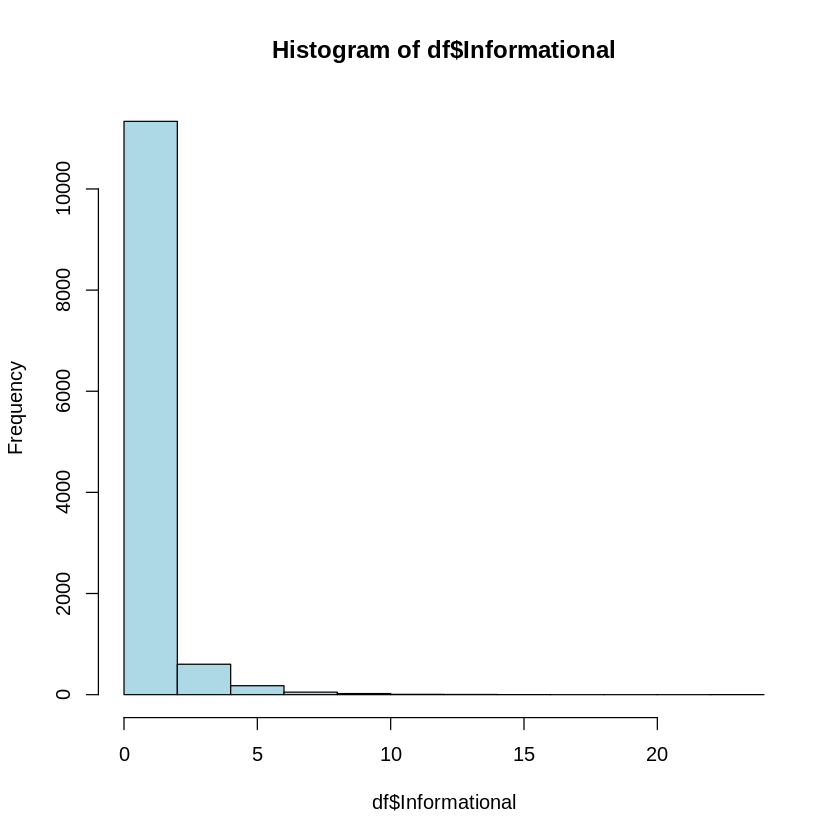

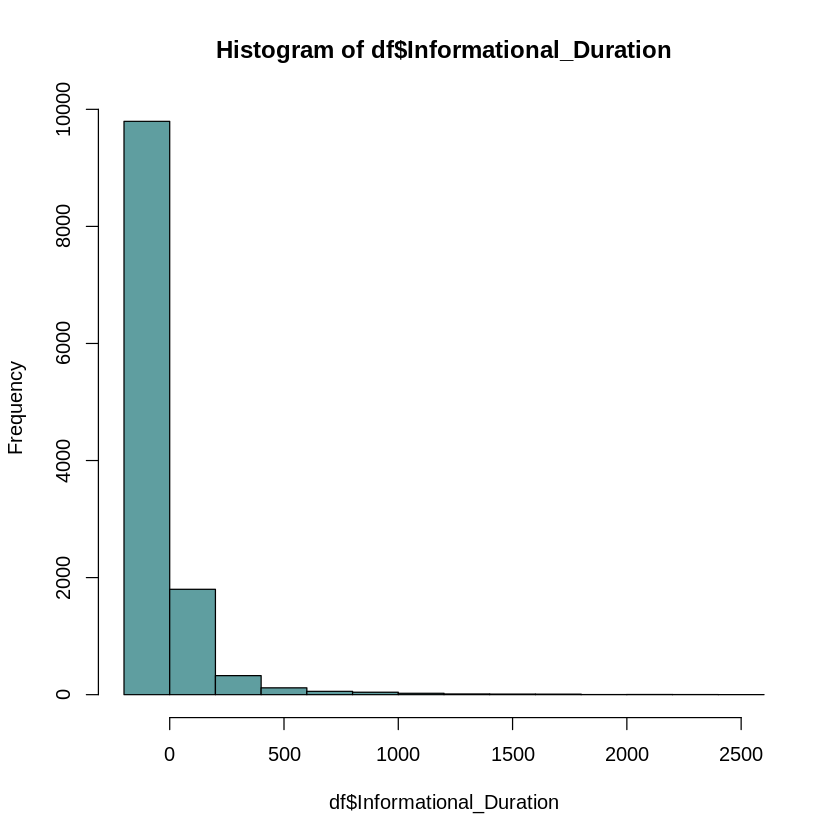

In [ ]:
# Histogram of information
hist(df$Informational, col='lightblue')
hist(df$Informational_Duration, col='cadetblue')

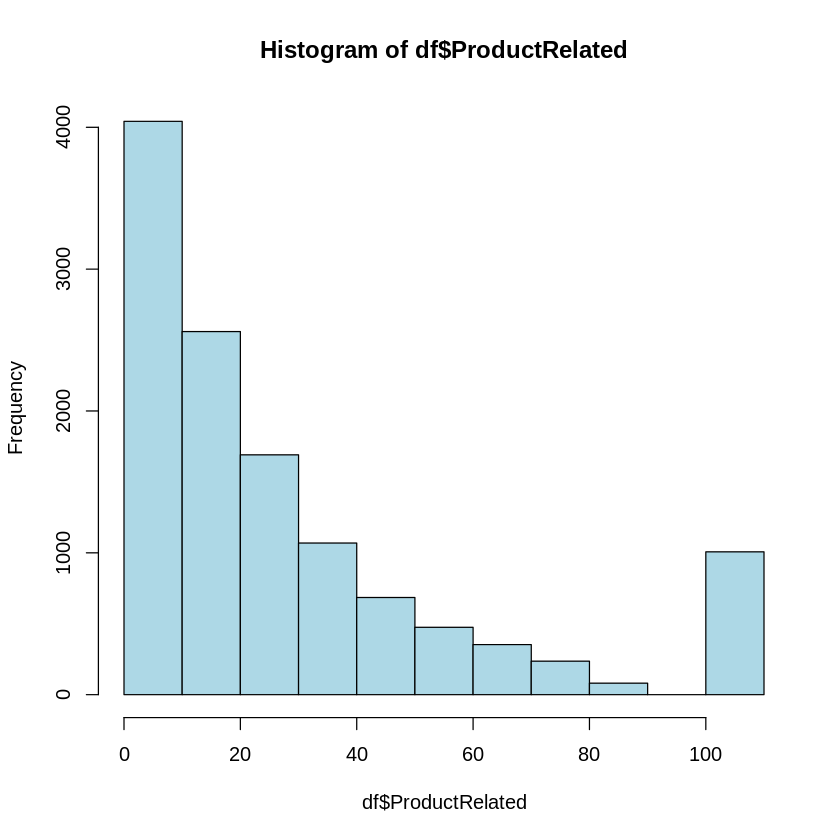

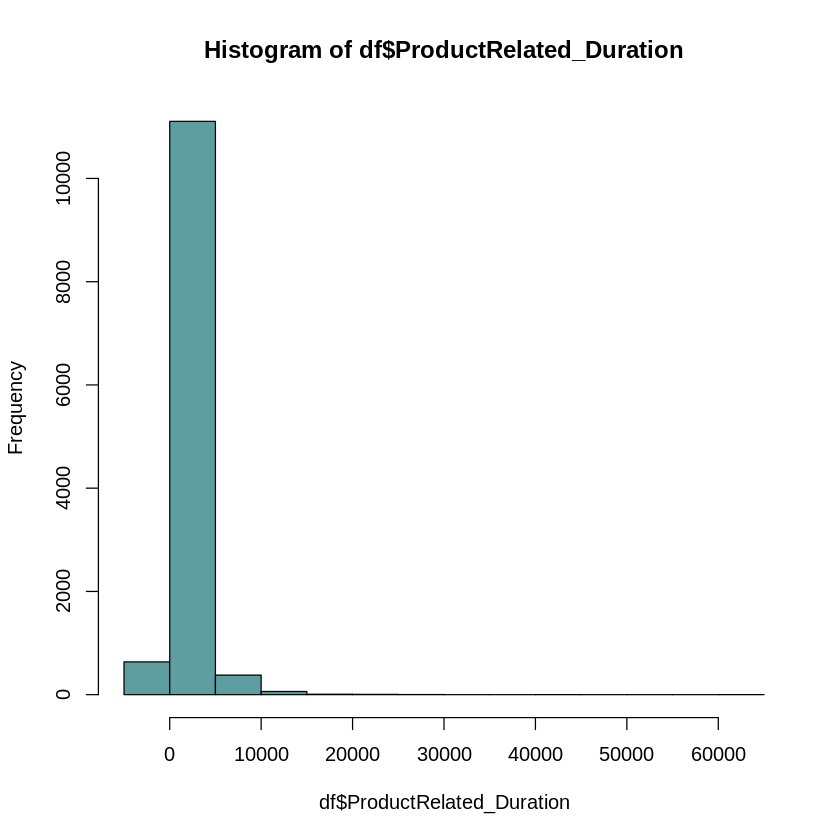

In [ ]:
# Histogram of product related 
hist(df$ProductRelated, col='lightblue')
hist(df$ProductRelated_Duration, col='cadetblue')

## Bivariate Analysis

In [ ]:
# Installing ggcorrplot package
install.packages("ggcorrplot") 
# loading the ggcorrplot library       
library("ggcorrplot") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Loading required package: ggplot2



In [ ]:
# correlation matrix of the numerical columns 
cor(num_df1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000000,0.585868165,0.355751376,0.238060917,0.43558845,0.343774635,-0.233321932,-0.345613000,0.10108710,-0.104174805,-0.003638454,-0.026724199,-0.004528880,-0.04087724
Administrative_Duration,0.585868165,1.000000000,0.301436296,0.237189860,0.26402040,0.353513793,-0.137333397,-0.206375820,0.06616837,-0.074736885,-0.005442188,-0.015833675,-0.006723711,-0.01507502
Informational,0.355751376,0.301436296,1.000000000,0.618677947,0.35678870,0.386083717,-0.109505298,-0.164662372,0.04739015,-0.049376774,-0.002433887,-0.038766808,-0.030477323,-0.03518669
Informational_Duration,0.238060917,0.237189860,0.618677947,1.000000000,0.24237311,0.346580691,-0.070159472,-0.104952273,0.03006416,-0.031293040,-0.005335798,-0.019609349,-0.027920098,-0.02516357
ProductRelated,0.435588455,0.264020396,0.356788705,0.242373112,1.00000000,0.720741378,-0.249945893,-0.372295354,0.08066983,-0.021092563,0.027146170,-0.018053078,-0.036428520,-0.05717066
ProductRelated_Duration,0.343774635,0.353513793,0.386083717,0.346580691,0.72074138,1.000000000,-0.174375499,-0.249799194,0.05084062,-0.038210652,0.015935784,-0.007838332,-0.034862498,-0.03750694
BounceRates,-0.233321932,-0.137333397,-0.109505298,-0.070159472,-0.24994589,-0.174375499,1.000000000,0.780500516,-0.11599198,0.087839995,0.024767031,-0.016018380,0.001432015,0.08919904
ExitRates,-0.345613000,-0.206375820,-0.164662372,-0.104952273,-0.37229535,-0.249799194,0.780500516,1.000000000,-0.17577605,0.123968255,0.014975151,-0.004247468,-0.010633979,0.08787920
PageValues,0.101087098,0.066168365,0.047390154,0.030064160,0.08066983,0.050840624,-0.115991977,-0.175776046,1.00000000,-0.064532709,-0.008092080,0.045845065,0.010590868,0.01223694
SpecialDay,-0.104174805,-0.074736885,-0.049376774,-0.031293040,-0.02109256,-0.038210652,0.087839995,0.123968255,-0.06453271,1.000000000,0.021359888,0.003465984,-0.016452464,0.05282794


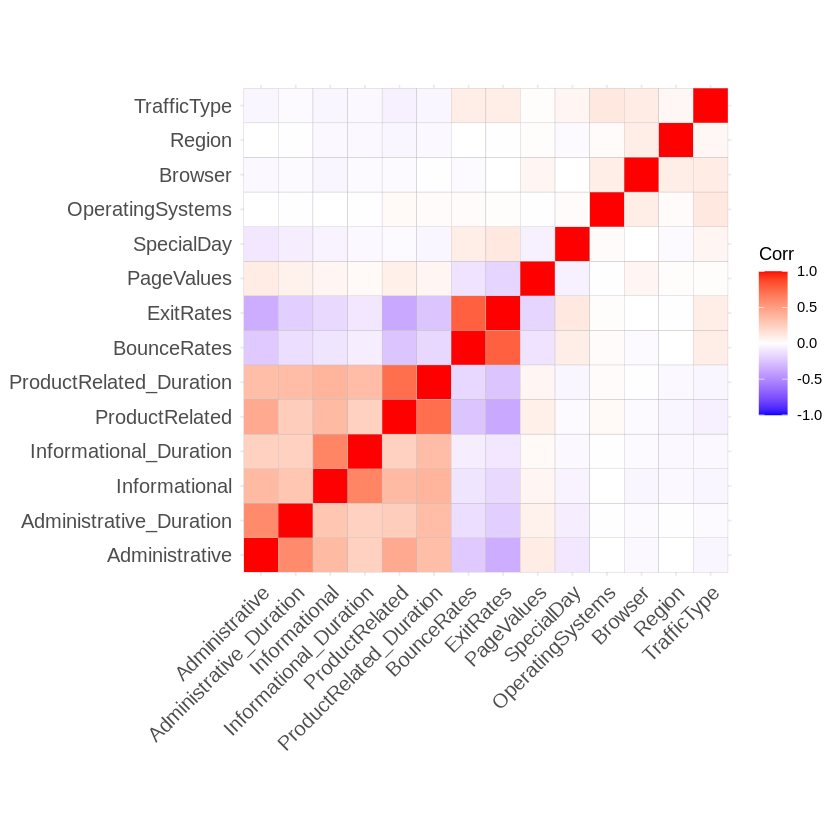

In [ ]:
#Now, we can use the ggcorrplot to create a correlation graph in the style of the ggplot2 package.
# coreelation heatmap
ggcorrplot(cor(num_df1))

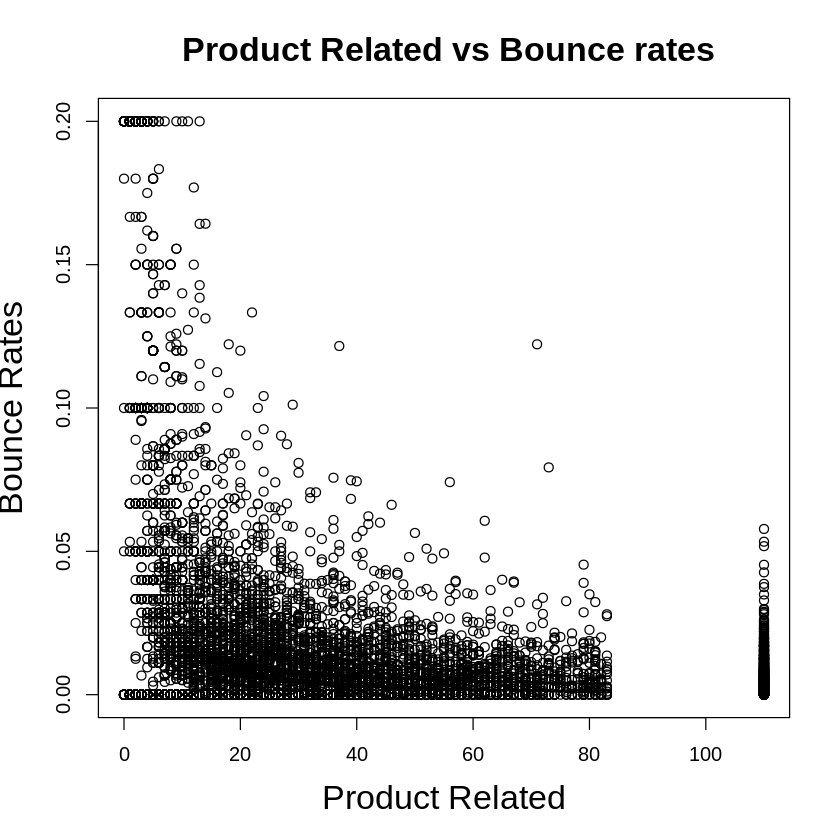

In [ ]:
# scatter plot of bounce rates vs product related 
Product<-df$ProductRelated
Bounce <- df$BounceRates
plot(Product, Bounce, xlab="Product Related", ylab="Bounce Rates", main = " Product Related vs Bounce rates", cex.main = 1.7 , cex.lab = 1.7)

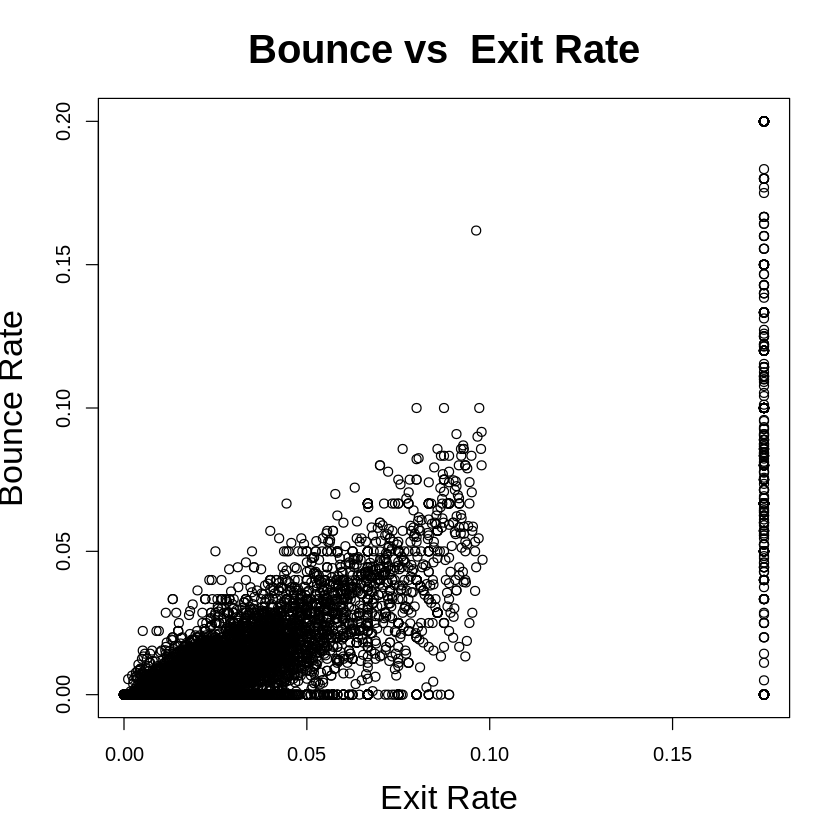

In [ ]:
# scatter plot of bounce rate vs exit rate 
plot(y = df$BounceRates, x = df$ExitRates,
     ylab = "Bounce Rate",
     xlab = " Exit Rate",
     main = "Bounce vs  Exit Rate",
     cex.main = 2 , cex.lab =1.7
)

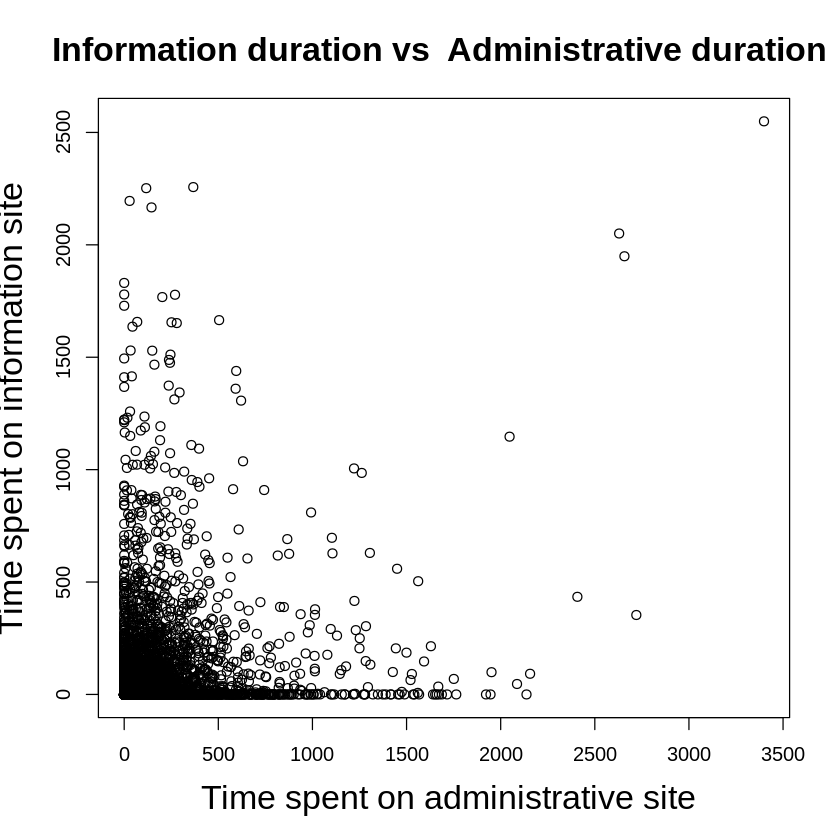

In [ ]:
# scatter plot of information duration  vs administrative duration
plot(y = df$Informational_Duration, x = df$Administrative_Duration,
     ylab = "Time spent on information site",
     xlab = " Time spent on administrative site",
     main = "Information duration vs  Administrative duration ",
     cex.main = 1.7 , cex.lab =1.7)

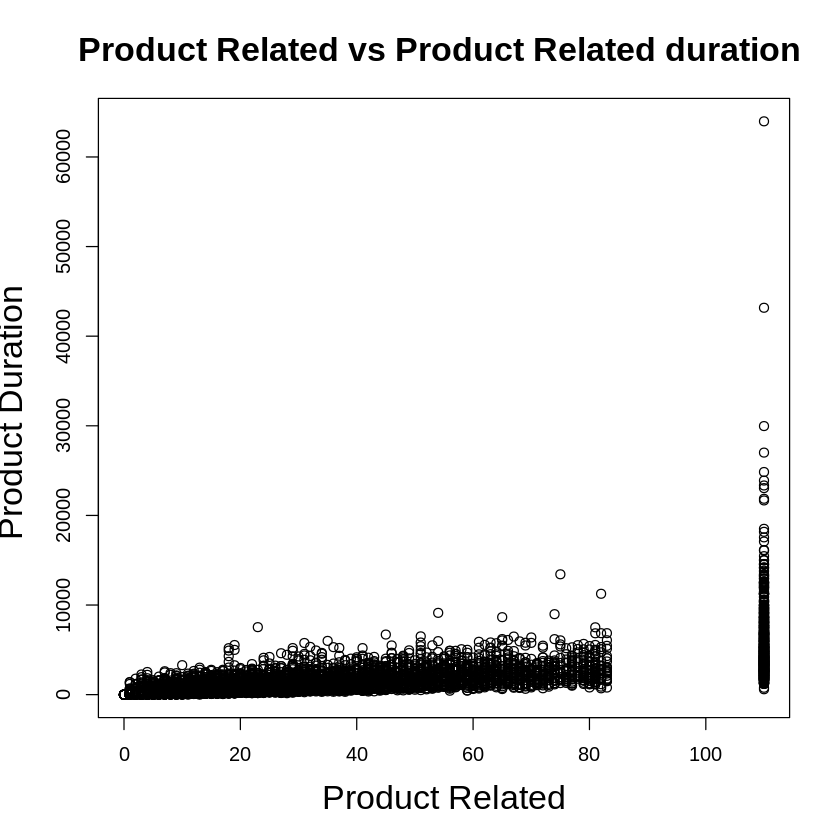

In [ ]:
# scatter plot of product related vs product related duration
plot(x = df$ProductRelated, y = df$ProductRelated_Duration,
     ylab = "Product Duration ",
     xlab = " Product Related ",
     main = "Product Related vs Product Related duration ",
     cex.main = 1.7 , cex.lab =1.7)

# Implementing the Solution

## K-Means Clustering

In [ ]:
#installing packages that will enable us to compute the number of clusters
#loading the packages
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)
library(factoextra)
library(NbClust)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Preprocessing the dataset
# removing the class label attribute

df.new<- df[, c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17)]
head(df.new)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.1750000,0,0,1,1,1,1,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1750000,0,0,2,2,1,2,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.1750000,0,0,4,1,9,3,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1750000,0,0,3,2,2,4,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4,TRUE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3,FALSE


In [ ]:
df.class<- df[, "Revenue"]
head(df.class)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [ ]:
# Normalizing the dataset so that no particular attribute 
# has more impact on clustering algorithm than others.
normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
df.new$Administrative<- normalize(df.new$Administrative)
df.new$Administrative_Duration<- normalize(df.new$Administrative_Duration)
df.new$Informational<- normalize(df.new$Informational)
df.new$Informational_Duration<- normalize(df.new$Informational_Duration)
df.new$ProductRelated<- normalize(df.new$ProductRelated)
df.new$ProductRelated_Duration<- normalize(df.new$ProductRelated_Duration)
df.new$BounceRates<- normalize(df.new$BounceRates)
df.new$ExitRates<- normalize(df.new$ExitRates)
df.new$PageValues<- normalize(df.new$PageValues)
df.new$SpecialDay<- normalize(df.new$SpecialDay)
df.new$OperatingSystems<- normalize(df.new$OperatingSystems)
df.new$Browser<- normalize(df.new$Browser)
df.new$Region<- normalize(df.new$Region)
df.new$TrafficType<- normalize(df.new$TrafficType)
df.new$Weekend<- normalize(df.new$Weekend)

In [ ]:
# Applying the K-means clustering algorithm with no. of centroids(k)=5
result<- kmeans(df.new,5) 

In [ ]:
# Previewing the no. of records in each cluster
result$size 

[1]  763 5652 1296 2338 2150

In [ ]:
# Getting the value of cluster center datapoint value(3 centers for k=3)
result$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
1,0.091087811,0.008756530,0.0117955439,0.007278724,0.23626832,0.01415309,0.07889656,0.2542988,0.00599228,0.707470511,0.3774574,0.1173001,0.2167431,0.1836932,0.1874181
2,0.126096957,0.014826127,0.0132696391,0.008135545,0.18301808,0.01238148,0.04176770,0.1688599,0.01683817,0.003361642,0.3586931,0.1087816,0.1243365,0.1555947,0.2482307
3,0.008950617,0.001234803,0.0009966564,0.001006605,0.03347363,0.00153911,0.61664543,0.9967000,0.00000000,0.091203704,0.3688272,0.1089892,0.2536651,0.2050032,0.1774691
4,0.635072712,0.068853324,0.0598802395,0.042549096,0.64254219,0.04922141,0.02989563,0.1065148,0.02499679,0.019418306,0.3592814,0.1025093,0.1893178,0.1368916,0.2480753
5,0.182372093,0.020289581,0.0155038760,0.008882644,0.21584778,0.01515881,0.03805165,0.1639772,0.01978591,0.015627907,0.3634109,0.1374031,0.7646512,0.1715055,0.2325581


In [ ]:
# Getting the cluster vector that shows the cluster where each record falls
result$cluster


1     2     3     4     5     6     7     8     9    10    11    12    13 
    3     3     3     3     2     2     3     3     1     1     2     1     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     3     5     3     2     3     2     1     3     2     1     3     5 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     3     2     1     3     5     2     2     2     5     2     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     5     1     2     1     2     2     2     3     2     3     3     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     2     1     3     3     2     5     1     1     3     4     5     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     4     3     2     3     3     5     3     2     2     2     4     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    3     3     2     1     2     2     3     3     2     2     1     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    3     3     2     1     3     2     1     1     2     1     1     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     3     1     2     1     4     1     3     3     2     2     2     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     5     2     1     1     2     3     3     1     5     5     3 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    3     2     3     1     1     2     5     2     3     2     3     5     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    3     2     1     2     2     2     1     2     3     3     2     2     2 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    3     1     3     1     2     2     1     1     2     2     3     5     1 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    1     2     3     3     1     2     5     2     1     5     3     3     1 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    2     2     2     4     4     4     3     2     2     2     5     4     4 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    2     5     4     5     2     2     2     2     5     2     5     5     2 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    2     2     5     5     2     2     5     2     2     2     5     3     3 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    2     2     3     4     2     2     2     5     4     2     2     2     2 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    2     4     2     2     4     2     5     2     2     2     5     2     4 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    2     5     2     3     3     3     2     2     5     2     2     5     3 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    2     2     5     2     5     2     2     2     2     3     2     4     2 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    5     2     5     2     2     2     2     4     2     5     2     3     2 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    4     2     5     2     2     3     2     2     2     2     3     2     2 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    2     3     5     2     3     3     3     2     2     2     2     3     2 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    4     2     3     2     2     2     5     2     5     2     4     2     2 
  328   329   330   331   332   333   334   335   336 

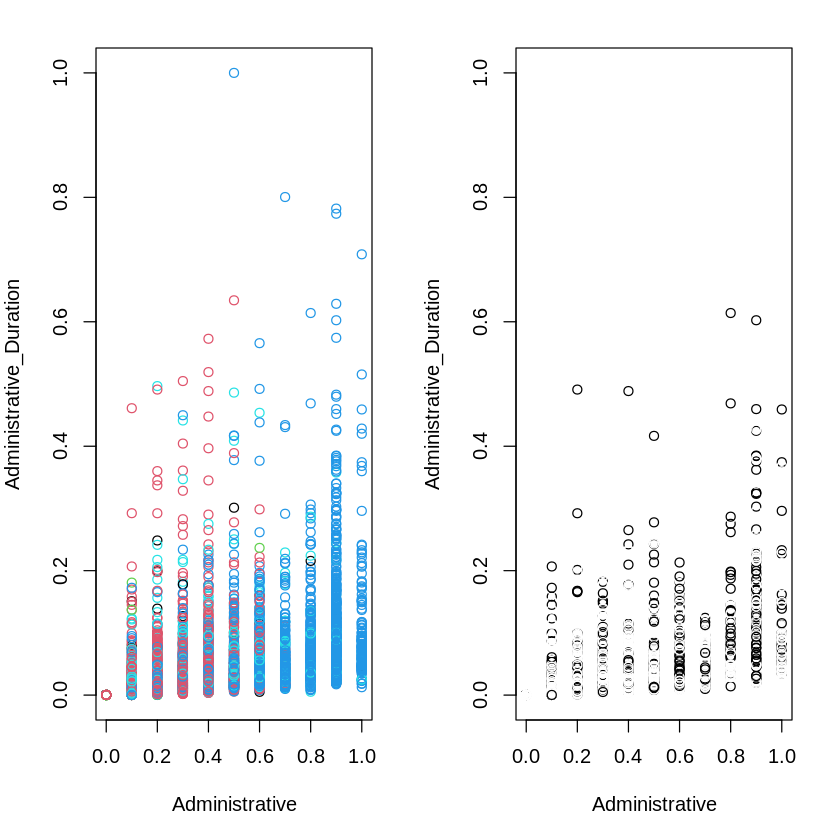

In [ ]:
# Visualizing the  clustering results
par(mfrow = c(1,2), mar = c(5,4,2,2))

# Plotting to see how administrative and administrative duration has been distributed
plot(df.new[,1:2], col = result$cluster)

# Plotting to see how administrative and administrative duration data points have been distributed 
# originally as per "class" attribute in dataset
plot(df.new[,1:2], col = df.class)

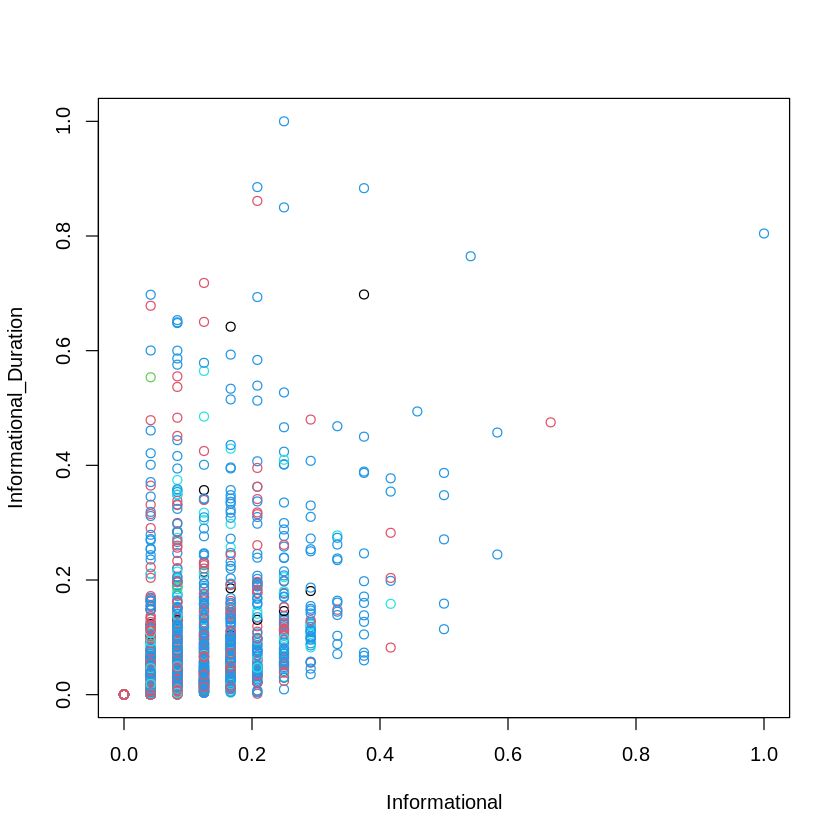

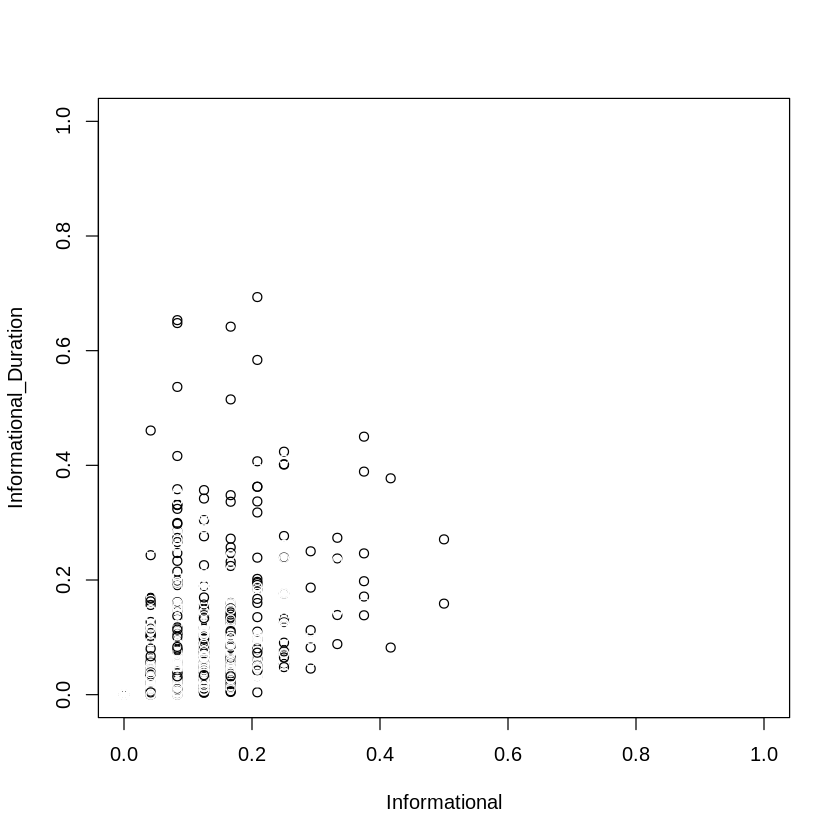

In [ ]:
# Plotting to see how information and information duration has been distributed
plot(df.new[,3:4], col = result$cluster)

# Plotting to see how administrative and administrative duration data points have been distributed 
# originally as per "class" attribute in dataset
plot(df.new[,3:4], col = df.class)

In [ ]:
# Result of table shows that Cluster 1 to cluster 5 and their corresponding classification

table(result$cluster, df.class)

   df.class
    FALSE TRUE
  1   711   52
  2  4774  878
  3  1288    8
  4  1723  615
  5  1795  355

In [ ]:
# Getting the accuracy of the model
result$betweenss / result$totss

[1] 0.3572749

The model achieved a very low accuracy of 39%. we are therefore going to optimize the model by increasing the number of k.

### Optimizing the K-means Algorithm 

In [ ]:
# Applying the K-means clustering algorithm with no. of centroids(k)=10
result1<- kmeans(df.new,10) 

In [ ]:
# Previewing the no. of records in each cluster
result1$size 

[1]  573 1489 3723  355  798  673  580  652 1695 1661

In [ ]:
# Getting the value of cluster center datapoint value(6 centers for k=6)
result1$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
1,0.014834206,0.0019285732,0.0015270506,0.0017942929,0.04911947,0.0027546182,0.25925879,0.9926031,0.000000000,0.12914485,0.3746364,0.1124200,0.2314572,0.19775879,0.0000000
2,0.186299530,0.0205359716,0.0150268637,0.0085676529,0.21928079,0.0153916958,0.03689865,0.1579476,0.017940899,0.02055071,0.3451981,0.1168570,0.7649429,0.11166095,0.0000000
3,0.131856030,0.0146674635,0.0135307548,0.0079819123,0.18329549,0.0124158221,0.03987937,0.1697506,0.017213523,0.00440505,0.3415704,0.1103725,0.1212732,0.08500502,0.0000000
4,0.487887324,0.0526162575,0.0753521127,0.0541300966,0.89011524,0.0690944446,0.03122904,0.1072041,0.023256663,0.05352113,0.4272300,0.1030516,0.2144366,0.16026686,1.0000000
5,0.141478697,0.0181416681,0.0109649123,0.0072840801,0.19892914,0.0139963486,0.06041018,0.1892072,0.018961675,0.02080201,0.4715957,0.1714703,0.2556391,0.63824034,0.0000000
6,0.550965825,0.0587375984,0.0351659237,0.0217834094,0.25546400,0.0156765102,0.02976048,0.1093906,0.022674860,0.02526003,0.3878158,0.1051263,0.3562407,0.14897943,1.0000000
7,0.082586207,0.0080992988,0.0109195402,0.0073856162,0.23576803,0.0142200395,0.07664771,0.2277163,0.006392161,0.64758621,0.3781609,0.1192529,0.2077586,0.16914701,0.0000000
8,0.002760736,0.0006731669,0.0003834356,0.0003740578,0.01918572,0.0004369546,0.96988503,0.9993102,0.000000000,0.08588957,0.3670757,0.1105573,0.2910276,0.21367452,0.2039877
9,0.068731563,0.0087046966,0.0115044248,0.0075910155,0.17168678,0.0115523517,0.05402091,0.2268148,0.015564367,0.06619469,0.3463127,0.1033923,0.2429941,0.16270765,1.0000000
10,0.644671884,0.0709290764,0.0600541842,0.0426443978,0.66250342,0.0513921328,0.02858021,0.1053962,0.024796489,0.02323901,0.3489866,0.1027493,0.1916767,0.11939542,0.0000000


In [ ]:
# Getting the accuracy of the model
result1$betweenss / result1$totss

[1] 0.5981044

Increasing the number of clusters from 5 to 10 increases the accuracy of the model significantly by more than 10%. 

## Agglomerative Hierarchical Clustering

In [ ]:
# Scaling the data to normalize it
df <- scale(num_df)
head(num_df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


In [ ]:
# Computing the Euclidian distance between the observations
dist <- dist(num_df, method = "euclidean")

# We then hierarchical clustering using the Ward's method
res.hc <- hclust(dist, method = "ward.D2" )

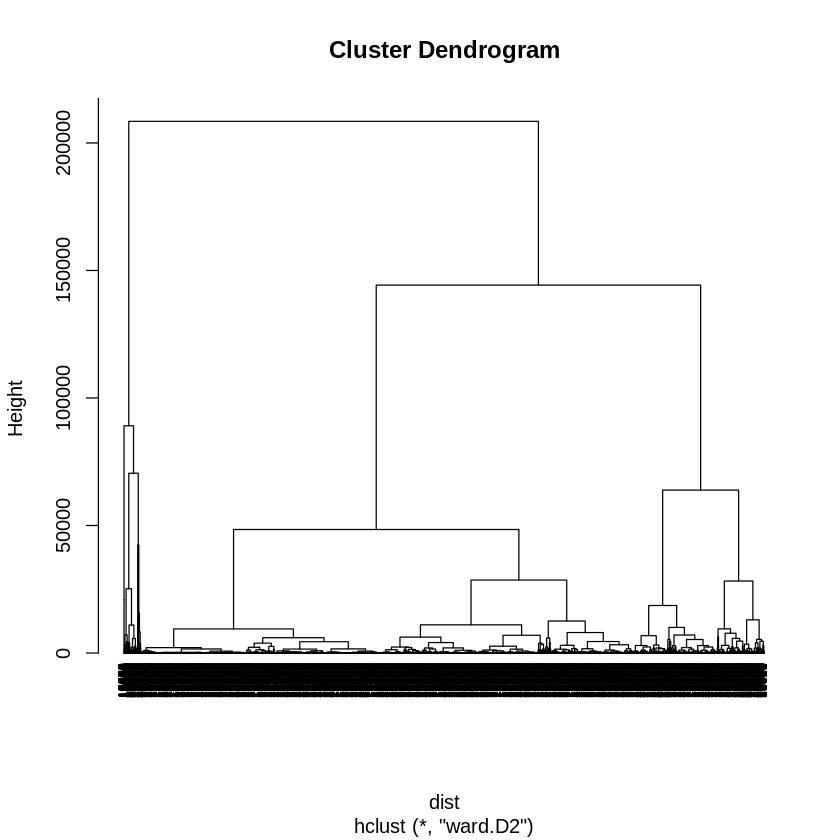

In [ ]:
# Plot the obtained dendrogram
plot(res.hc, cex = 0.6, hang = -1)

In [ ]:
# number of memebers in each cluster 
cut_avg <- cutree(res.hc, k = 5)
table (cut_avg)

cut_avg
   1    2    3    4    5 
9369 2507  257   64    2 

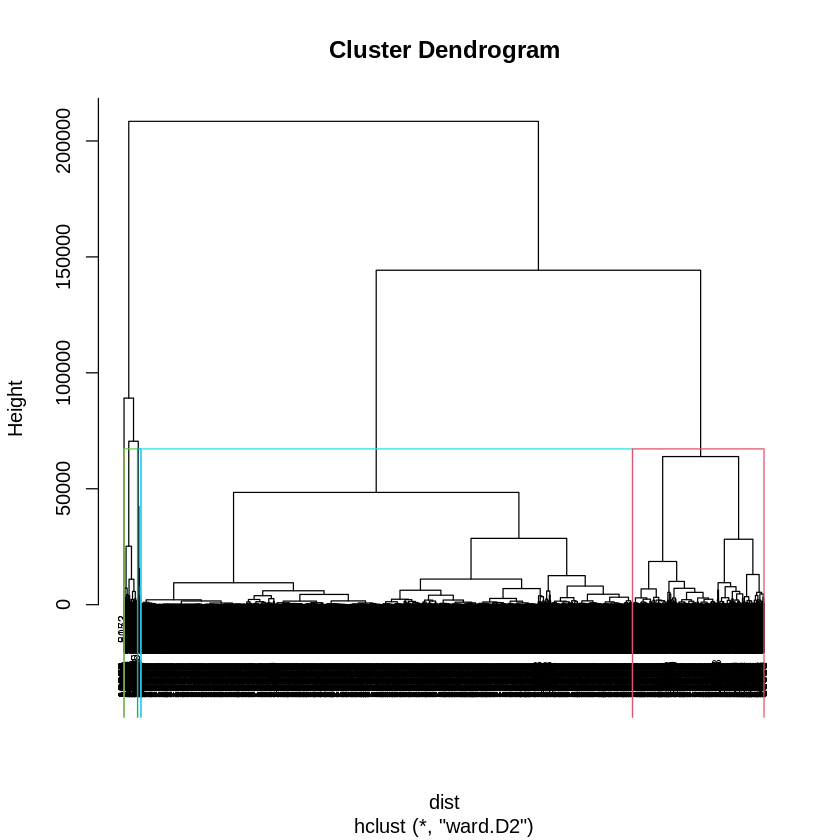

In [ ]:
# plotting how clusters in the dendogram 
plot(res.hc , cex = 0.6 )
rect.hclust(res.hc, k = 5, border = 2:5)

# Conclusion 

The K means cluster we fisrt choose an arbitraty number k set at 5. This model however had a very low accuracy of 39% which was optimized by increasing the k to 10. This clustering method is appropriate for this data since we have a large number of variables that is 17 variables and therefore it was computationally faster than the hierarchical clustreing. 

The Agglomerative hierarchical cluster algorithm uses the wardD2 method and we divide into 5 clusters same as the initial k means cluster model. This algorithm however produces bad results as seen from the visualization of the dendograms because of the huge size of the data. 


# Challlenge the Solution 

The K-means clustering and Hierarchical clustering algorithms can be challenged using the DBSCAN clustering which is an algorithm that makes the assumption that clusters are dense regions in space separated by regions of lower density. 

# Follow Up Questions 

a) Did we have the right data 

Yes, the data was appropriate for modelling with unsupervised learning techiques.  

b) Did we have the right question for analysis 

Yes, the right question for analysis was asked that is: creating clusters of the customer groups to understand their charactertics.


c) Do we need another data to answer the question 

No. 